## Import libraries and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns

In [2]:
plt.style.use('seaborn-bright')

In [3]:
df_train        = pd.read_csv('train.csv', usecols=[1,2,3,4,5])
df_items        = pd.read_csv('items.csv')
df_oil          = pd.read_csv('oil.csv')
df_stores       = pd.read_csv('stores.csv')
df_holiday      = pd.read_csv('holidays_events.csv')
df_transactions = pd.read_csv('transactions.csv')

C:\Users\Pranav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Exploratory Data Analysis

### Train data

In [4]:
df_train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [5]:
df_train.shape

(125497040, 5)

In [6]:
df_train.dtypes

date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion     object
dtype: object

In [7]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.iloc[1]['date']

Timestamp('2013-01-01 00:00:00')

In [8]:
df_train.isna().sum()/len(df_train)

date           0.000000
store_nbr      0.000000
item_nbr       0.000000
unit_sales     0.000000
onpromotion    0.172575
dtype: float64

In [9]:
df_train.describe()

,store_nbr,item_nbr,unit_sales
count,1.254970e+08,1.254970e+08,1.254970e+08
mean,2.746458e+01,9.727692e+05,8.554865e+00
std,1.633051e+01,5.205336e+05,2.360515e+01
min,1.000000e+00,9.699500e+04,-1.537200e+04
25%,1.200000e+01,5.223830e+05,2.000000e+00
50%,2.800000e+01,9.595000e+05,4.000000e+00
75%,4.300000e+01,1.354380e+06,9.000000e+00
max,5.400000e+01,2.127114e+06,8.944000e+04


**Some of the unit sales values appear to be negative**

In [10]:
df_train[df_train['unit_sales'] < 0].shape

(7795, 5)

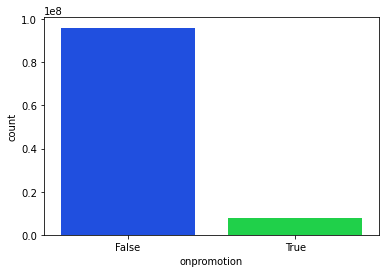

In [11]:
sns.countplot(data = df_train,x = 'onpromotion')
plt.show()

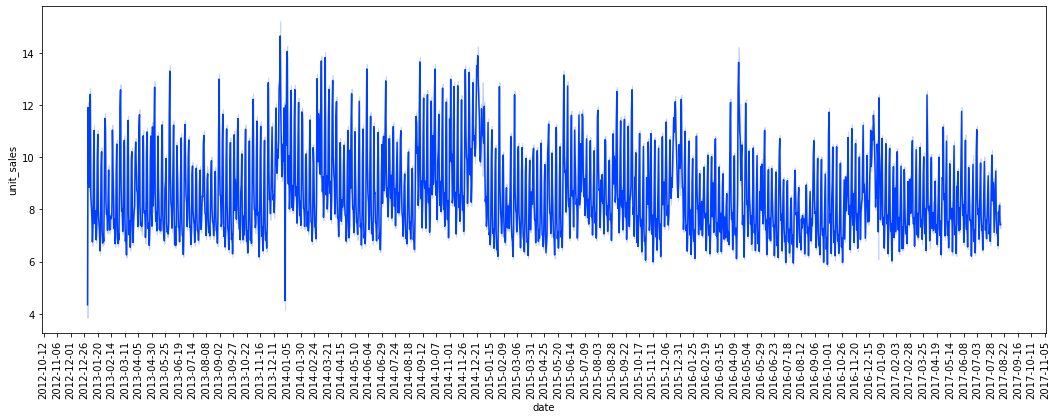

In [12]:
plt.figure(figsize=(18,6))
sns.lineplot(data = df_train,x='date',y='unit_sales')
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=25.0))
plt.show()

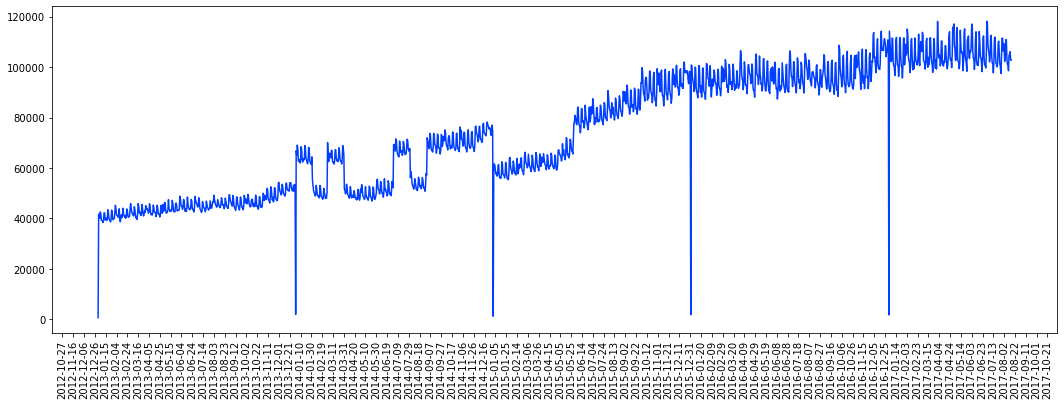

In [13]:
plt.figure(figsize=(18,6))
plt.plot(df_train.groupby('date')['date'].count().index,df_train.groupby('date')['date'].count().values)
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=20.0))
plt.show()

### Items data

In [14]:
df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [15]:
df_items.shape

(4100, 4)

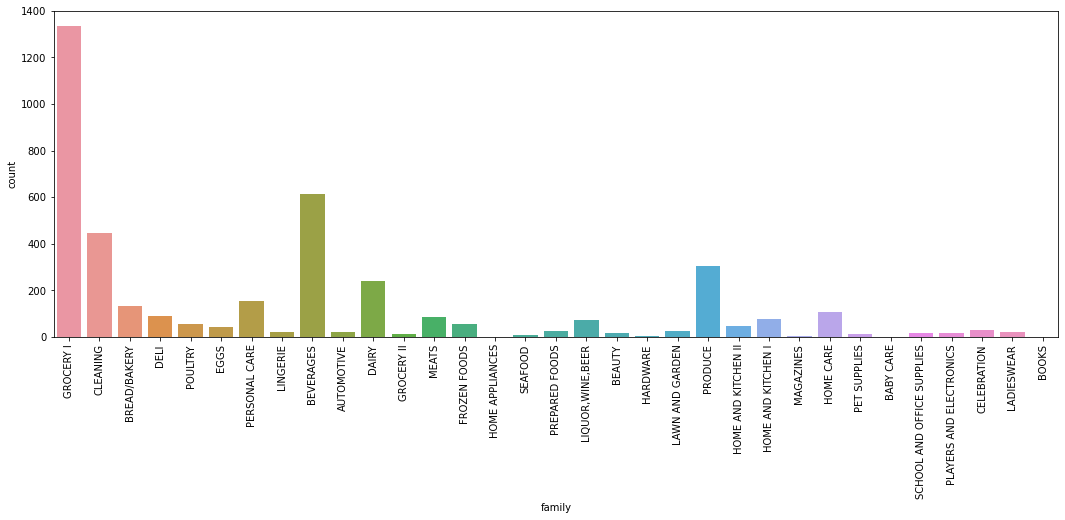

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(data = df_items,x = 'family')
plt.xticks(rotation=90)
plt.show()

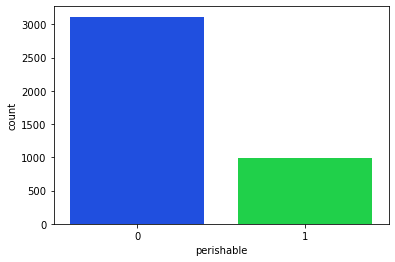

In [17]:
sns.countplot(data = df_items,x = 'perishable')
plt.show()

### Stores

In [18]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


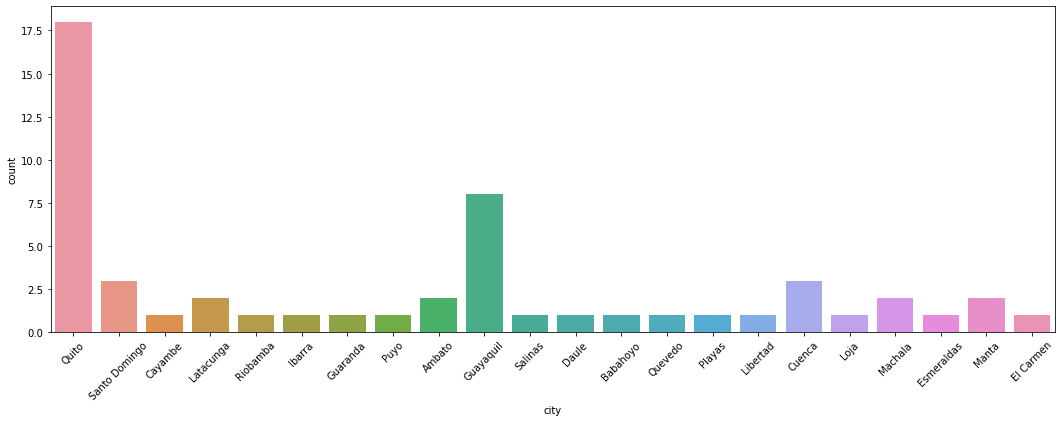

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(data = df_stores,x='city')
plt.xticks(rotation=45)
plt.show()

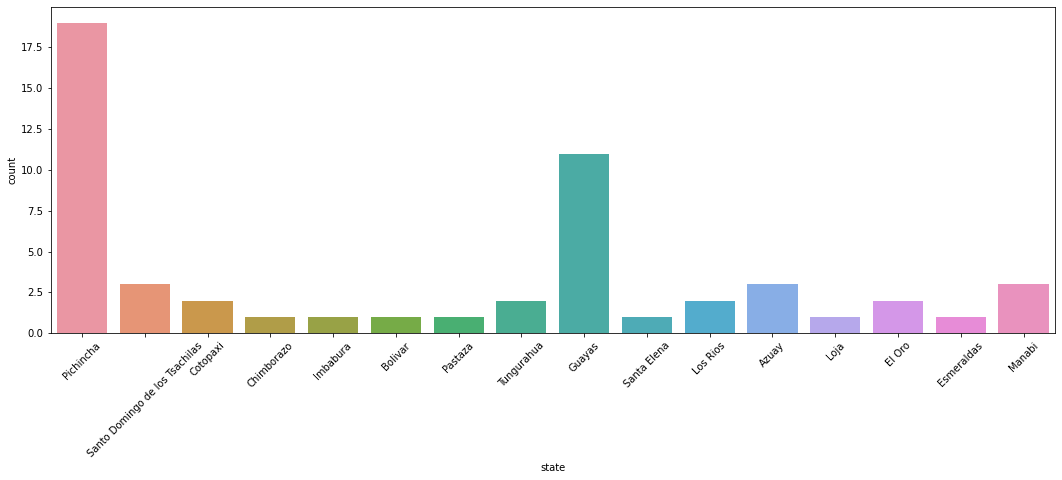

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(data = df_stores,x='state')
plt.xticks(rotation=45)
plt.show()

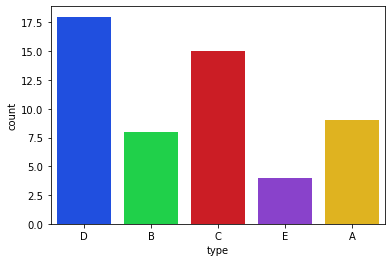

In [21]:
sns.countplot(data = df_stores,x='type')
plt.show()

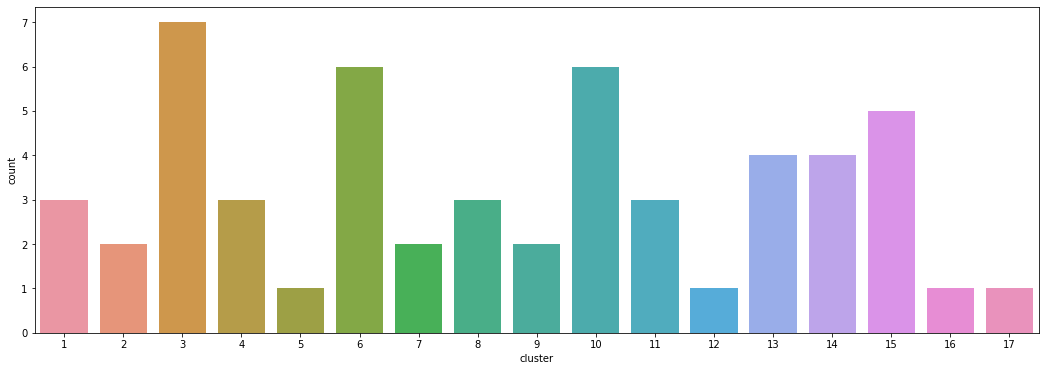

In [22]:
plt.figure(figsize=(18,6))
sns.countplot(data = df_stores,x='cluster')
plt.show()

### Oil

In [23]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [24]:
df_oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [25]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_oil.iloc[1]['date']

Timestamp('2013-01-02 00:00:00')

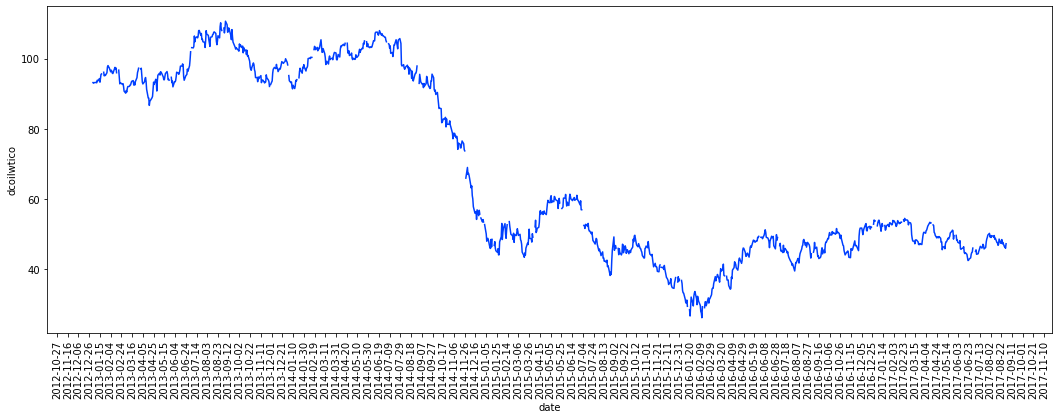

In [26]:
plt.figure(figsize=(18,6))
sns.lineplot(data = df_oil,x='date',y='dcoilwtico')
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=20.0))
plt.show()

In [27]:
df_oil.isna().sum()/len(df_oil)

date          0.000000
dcoilwtico    0.035304
dtype: float64

### Holidays

In [28]:
df_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


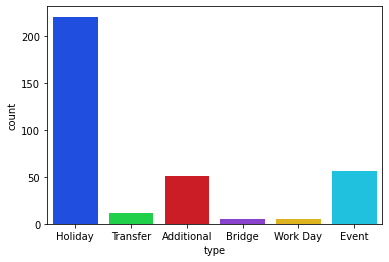

In [29]:
sns.countplot(data = df_holiday,x='type')
plt.show()

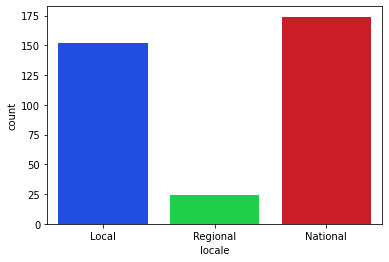

In [30]:
sns.countplot(data = df_holiday,x='locale')
plt.show()

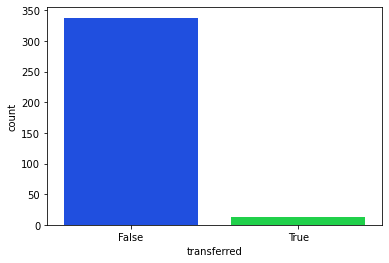

In [31]:
sns.countplot(data = df_holiday,x='transferred')
plt.show()

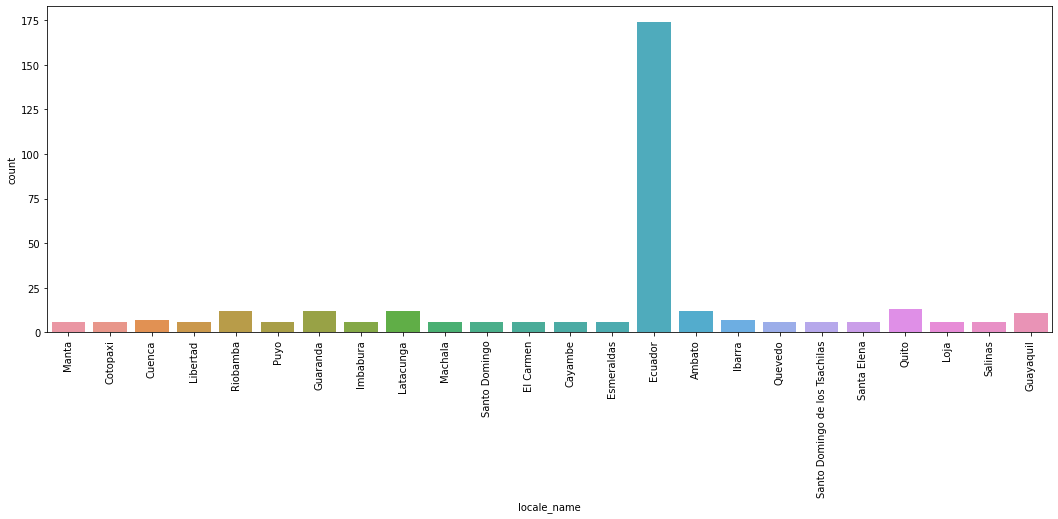

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(data = df_holiday,x='locale_name')
plt.xticks(rotation=90)
plt.show()

### Transactions

In [33]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [34]:
df_transactions.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [35]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_transactions.iloc[1]['date']

Timestamp('2013-01-02 00:00:00')

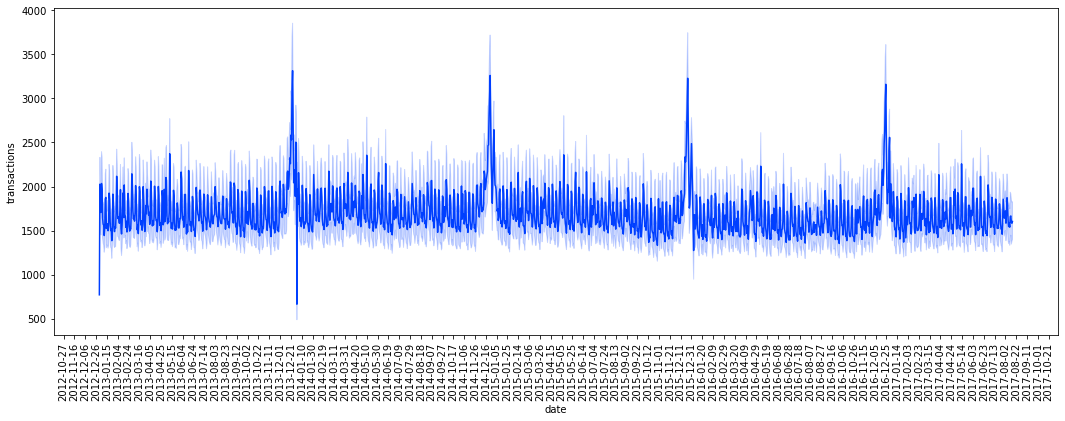

In [36]:
plt.figure(figsize=(18,6))
sns.lineplot(data = df_transactions,x='date',y='transactions')
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=20.0))
plt.show()

### Outlier Detection

In [37]:
def plot_box_grid(row,col,cols,df):
    
    fig, axes = plt.subplots(nrows=row, ncols=col,figsize=(12,4))
    i = 0
    for ax in axes.flatten():
        sns.boxplot(x = cols[i],ax= ax,data = df[i])
        i += 1
    
    # Display the figure object    
    fig
    plt.tight_layout()

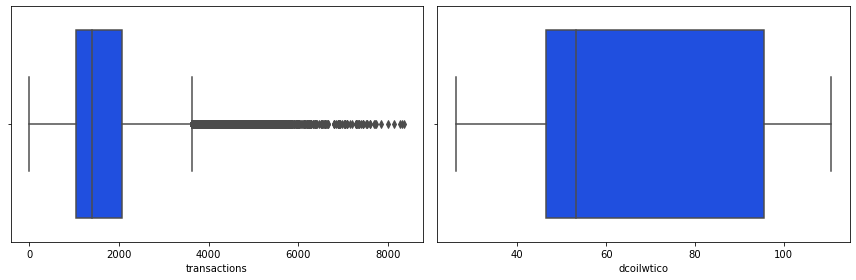

In [38]:
plot_box_grid(1,2,["transactions","dcoilwtico"],[df_transactions,df_oil])

## Data Preparation

**Let's fill in the missing values in the oil dataframe**

In [39]:
df_oil.shape

(1218, 2)

In [40]:
df_train['date'].nunique()

1684

In [41]:
df_oil = df_oil.set_index('date')
df_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [42]:
df_oil = pd.DataFrame(df_oil['dcoilwtico'].asfreq(freq ='D'))
df_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-05,NaN


In [43]:
df_oil = df_oil.assign(InterpolateTime=df_oil.dcoilwtico.interpolate(method='time'))

In [44]:
df_oil.drop('dcoilwtico',axis=1,inplace=True)
df_oil.columns = ['Oil Price']
df_oil.reset_index(inplace=True)
df_oil['Oil Price'].iloc[0] = df_oil['Oil Price'].iloc[1]
df_oil.head()

C:\Users\Pranav\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,date,Oil Price
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667


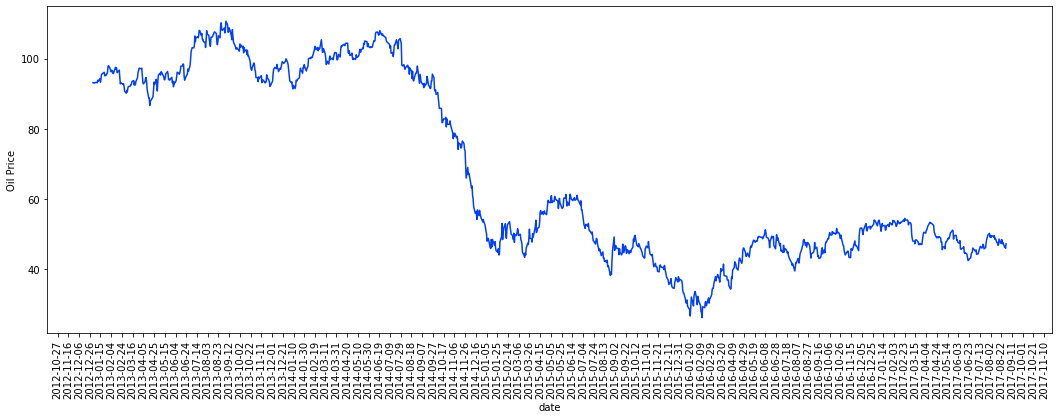

In [45]:
plt.figure(figsize=(18,6))
sns.lineplot(data = df_oil,x='date',y='Oil Price')
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(plticker.MultipleLocator(base=20.0))
plt.show()

**Let's deal with missing values in the train set**

In [46]:
df_train['onpromotion'] = df_train['onpromotion'].fillna(False)

In [47]:
df_train['onpromotion'].isna().sum()

0

**Let's deal with negative values in unit sales**

In [48]:
df_train.loc[df_train['unit_sales']<0,'unit_sales'] = 0
df_train[df_train['unit_sales'] < 0]

,date,store_nbr,item_nbr,unit_sales,onpromotion


**Let's merge the dataframes**

In [49]:
df = pd.merge(df_train,df_items,on='item_nbr')
df.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1
1,2013-01-02,1,103665,2.0,False,BREAD/BAKERY,2712,1
2,2013-01-02,2,103665,5.0,False,BREAD/BAKERY,2712,1
3,2013-01-02,3,103665,6.0,False,BREAD/BAKERY,2712,1
4,2013-01-02,4,103665,2.0,False,BREAD/BAKERY,2712,1


In [50]:
df= pd.merge(df,df_stores,on='store_nbr')
df.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
1,2013-01-02,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
2,2013-01-04,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
3,2013-01-05,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1
4,2013-01-06,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1


In [51]:
df = pd.merge(df,df_oil,on='date',how='left')
df.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,Oil Price
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.140000
1,2013-01-02,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.140000
2,2013-01-04,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.120000
3,2013-01-05,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.146667
4,2013-01-06,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.173333


In [52]:
df.shape

(125497040, 13)

In [53]:
df.isna().sum()

date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
family         0
class          0
perishable     0
city           0
state          0
type           0
cluster        0
Oil Price      0
dtype: int64

In [54]:
df.to_csv('final.csv',index=False)